In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.linear_model import LinearRegression

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = yf.download('BTC-USD', '2015-01-01', '2021-10-01')

X = df[['Open', 'High', 'Low', 'Volume']]
y = df['Adj Close'].values

[*********************100%***********************]  1 of 1 completed


In [3]:
def lineplot(x, y):
    plt.figure(figsize=(10, 6), dpi = 500)
    return sns.lineplot(x, y)

/Users/bengroves/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='Adj Close'>

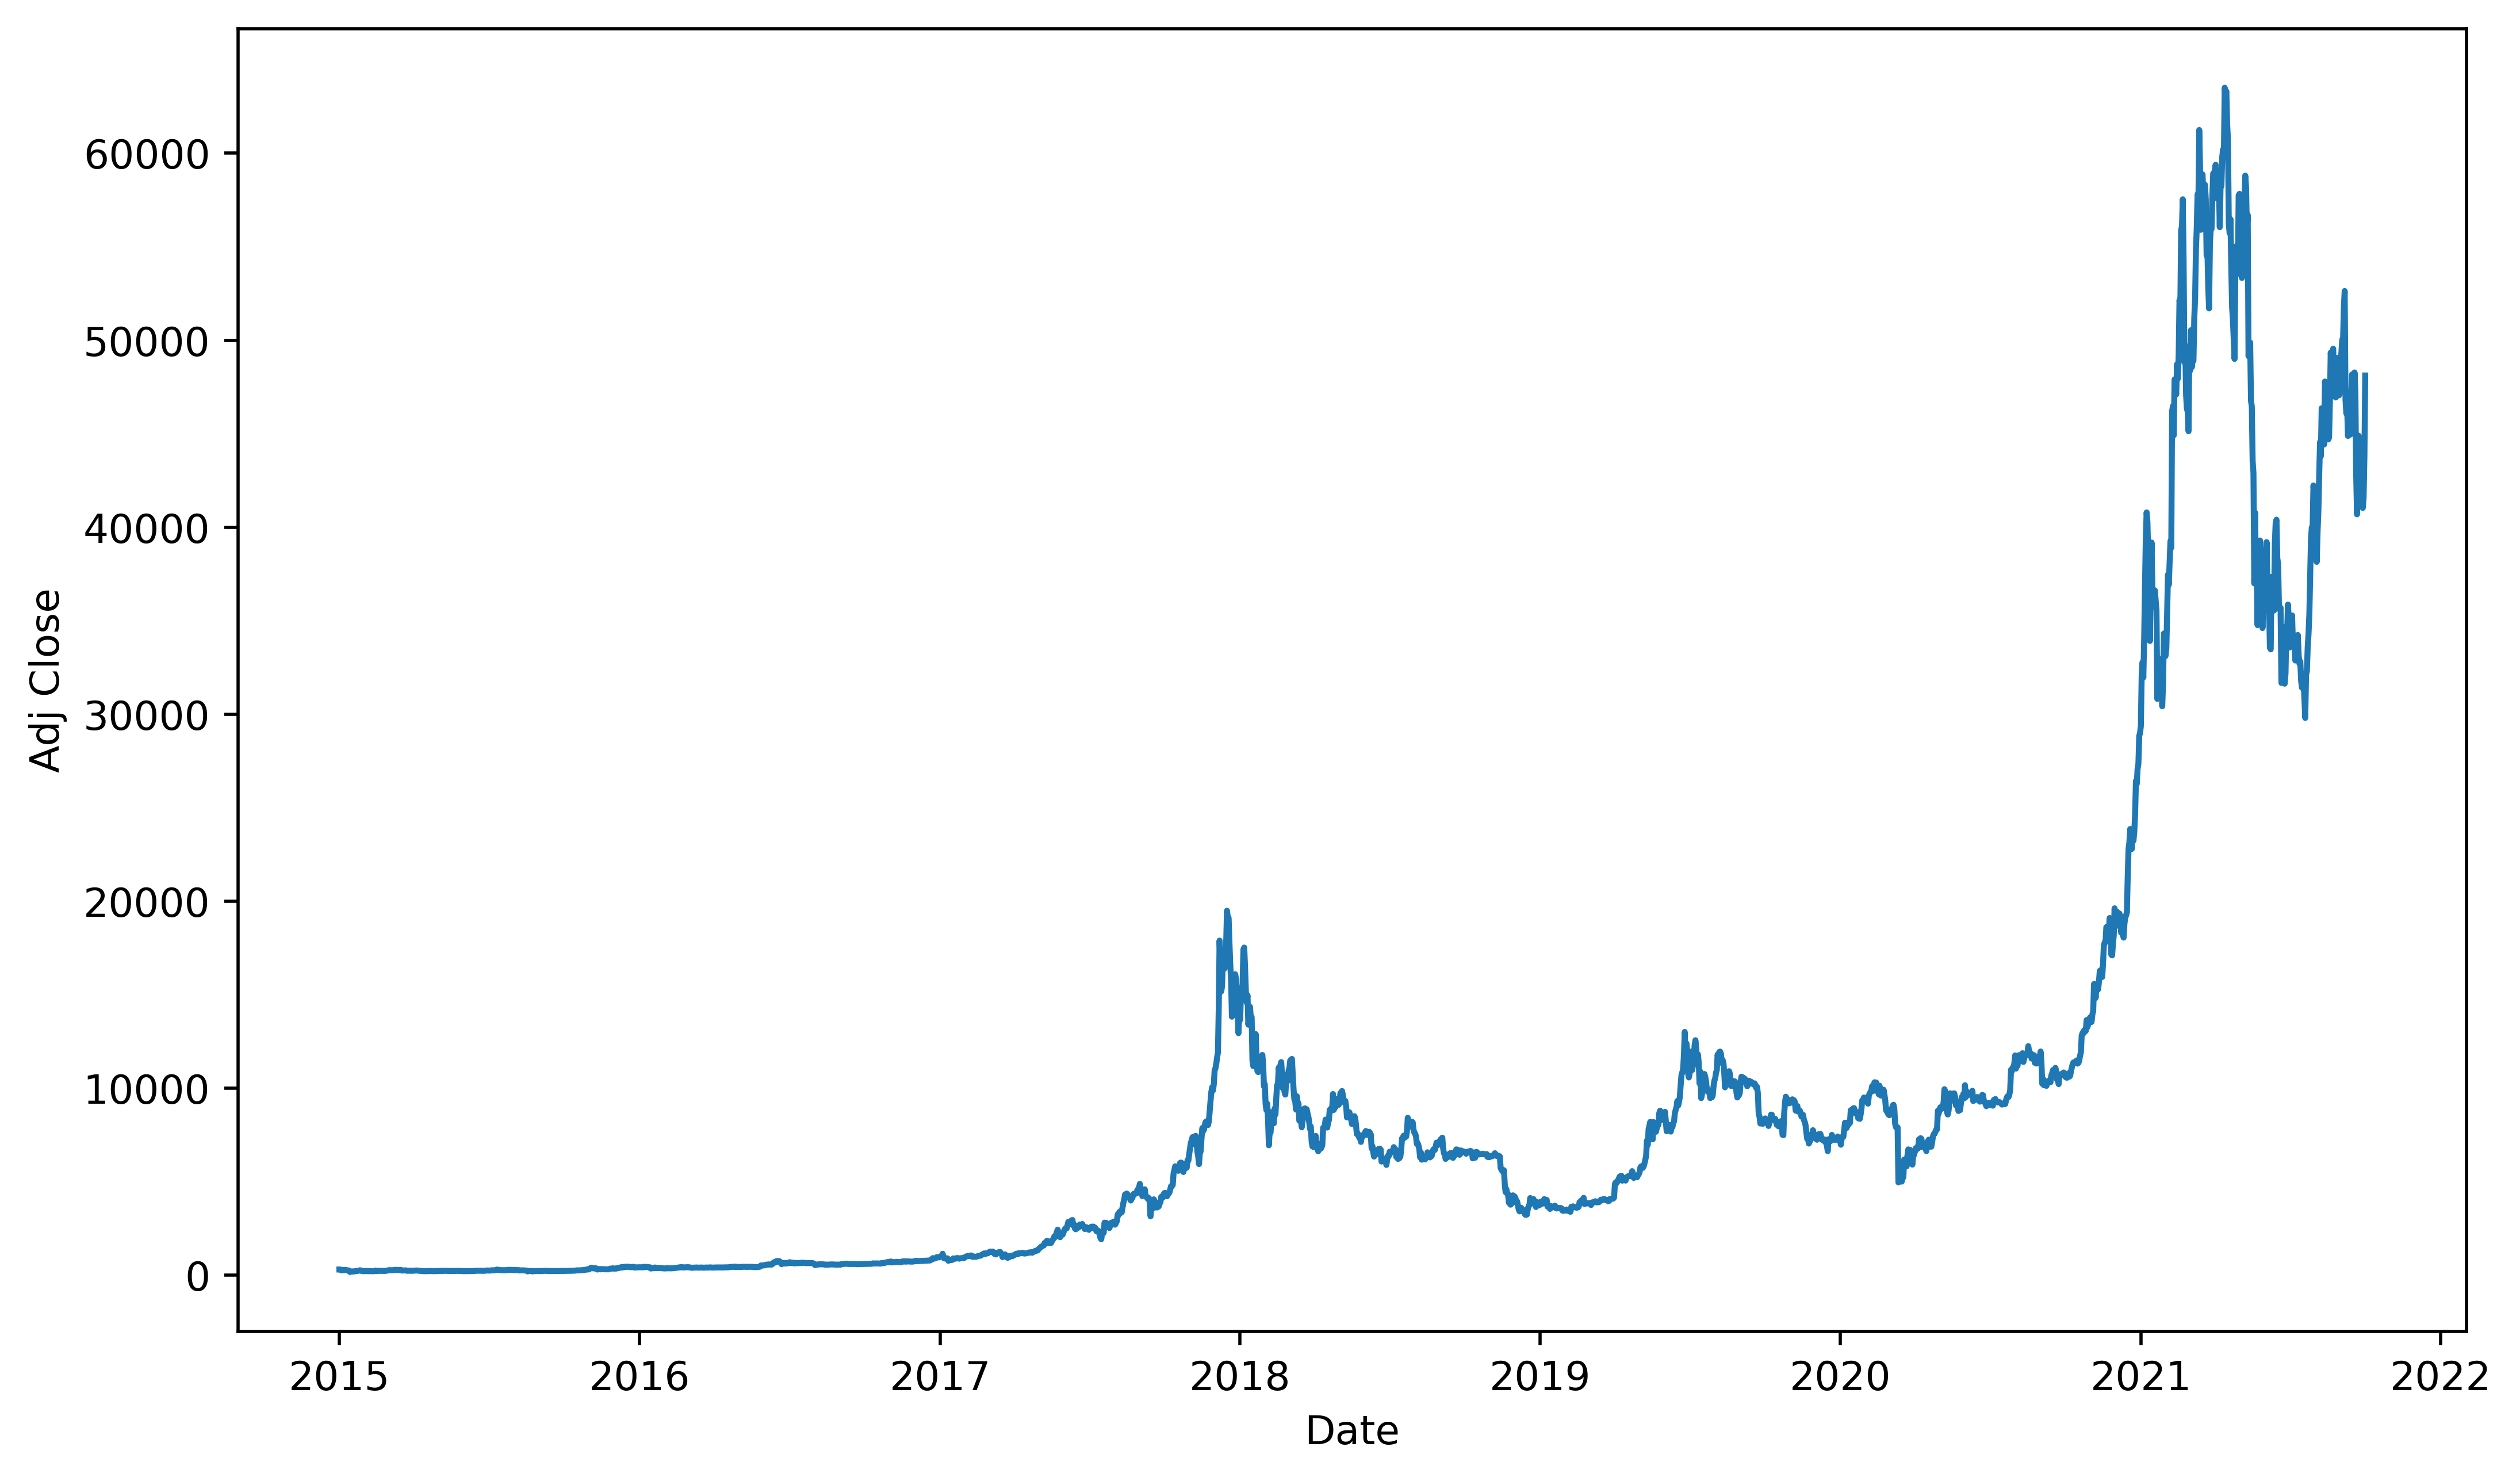

In [4]:
lineplot(df.index, df['Adj Close'])

In [5]:
X = df.drop('Adj Close', axis = 1)
y = df['Adj Close']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [7]:
print("X_train shape {}, X_test shape {}, y_train shape {}, y_test shape{}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

X_train shape (1723, 5), X_test shape (739, 5), y_train shape (1723,), y_test shape(739,)


In [8]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Mean of the target 9537.008354453514 Mean square error is 9.850949964180798e-23 and mean absolute error is 5.996826851063254e-12


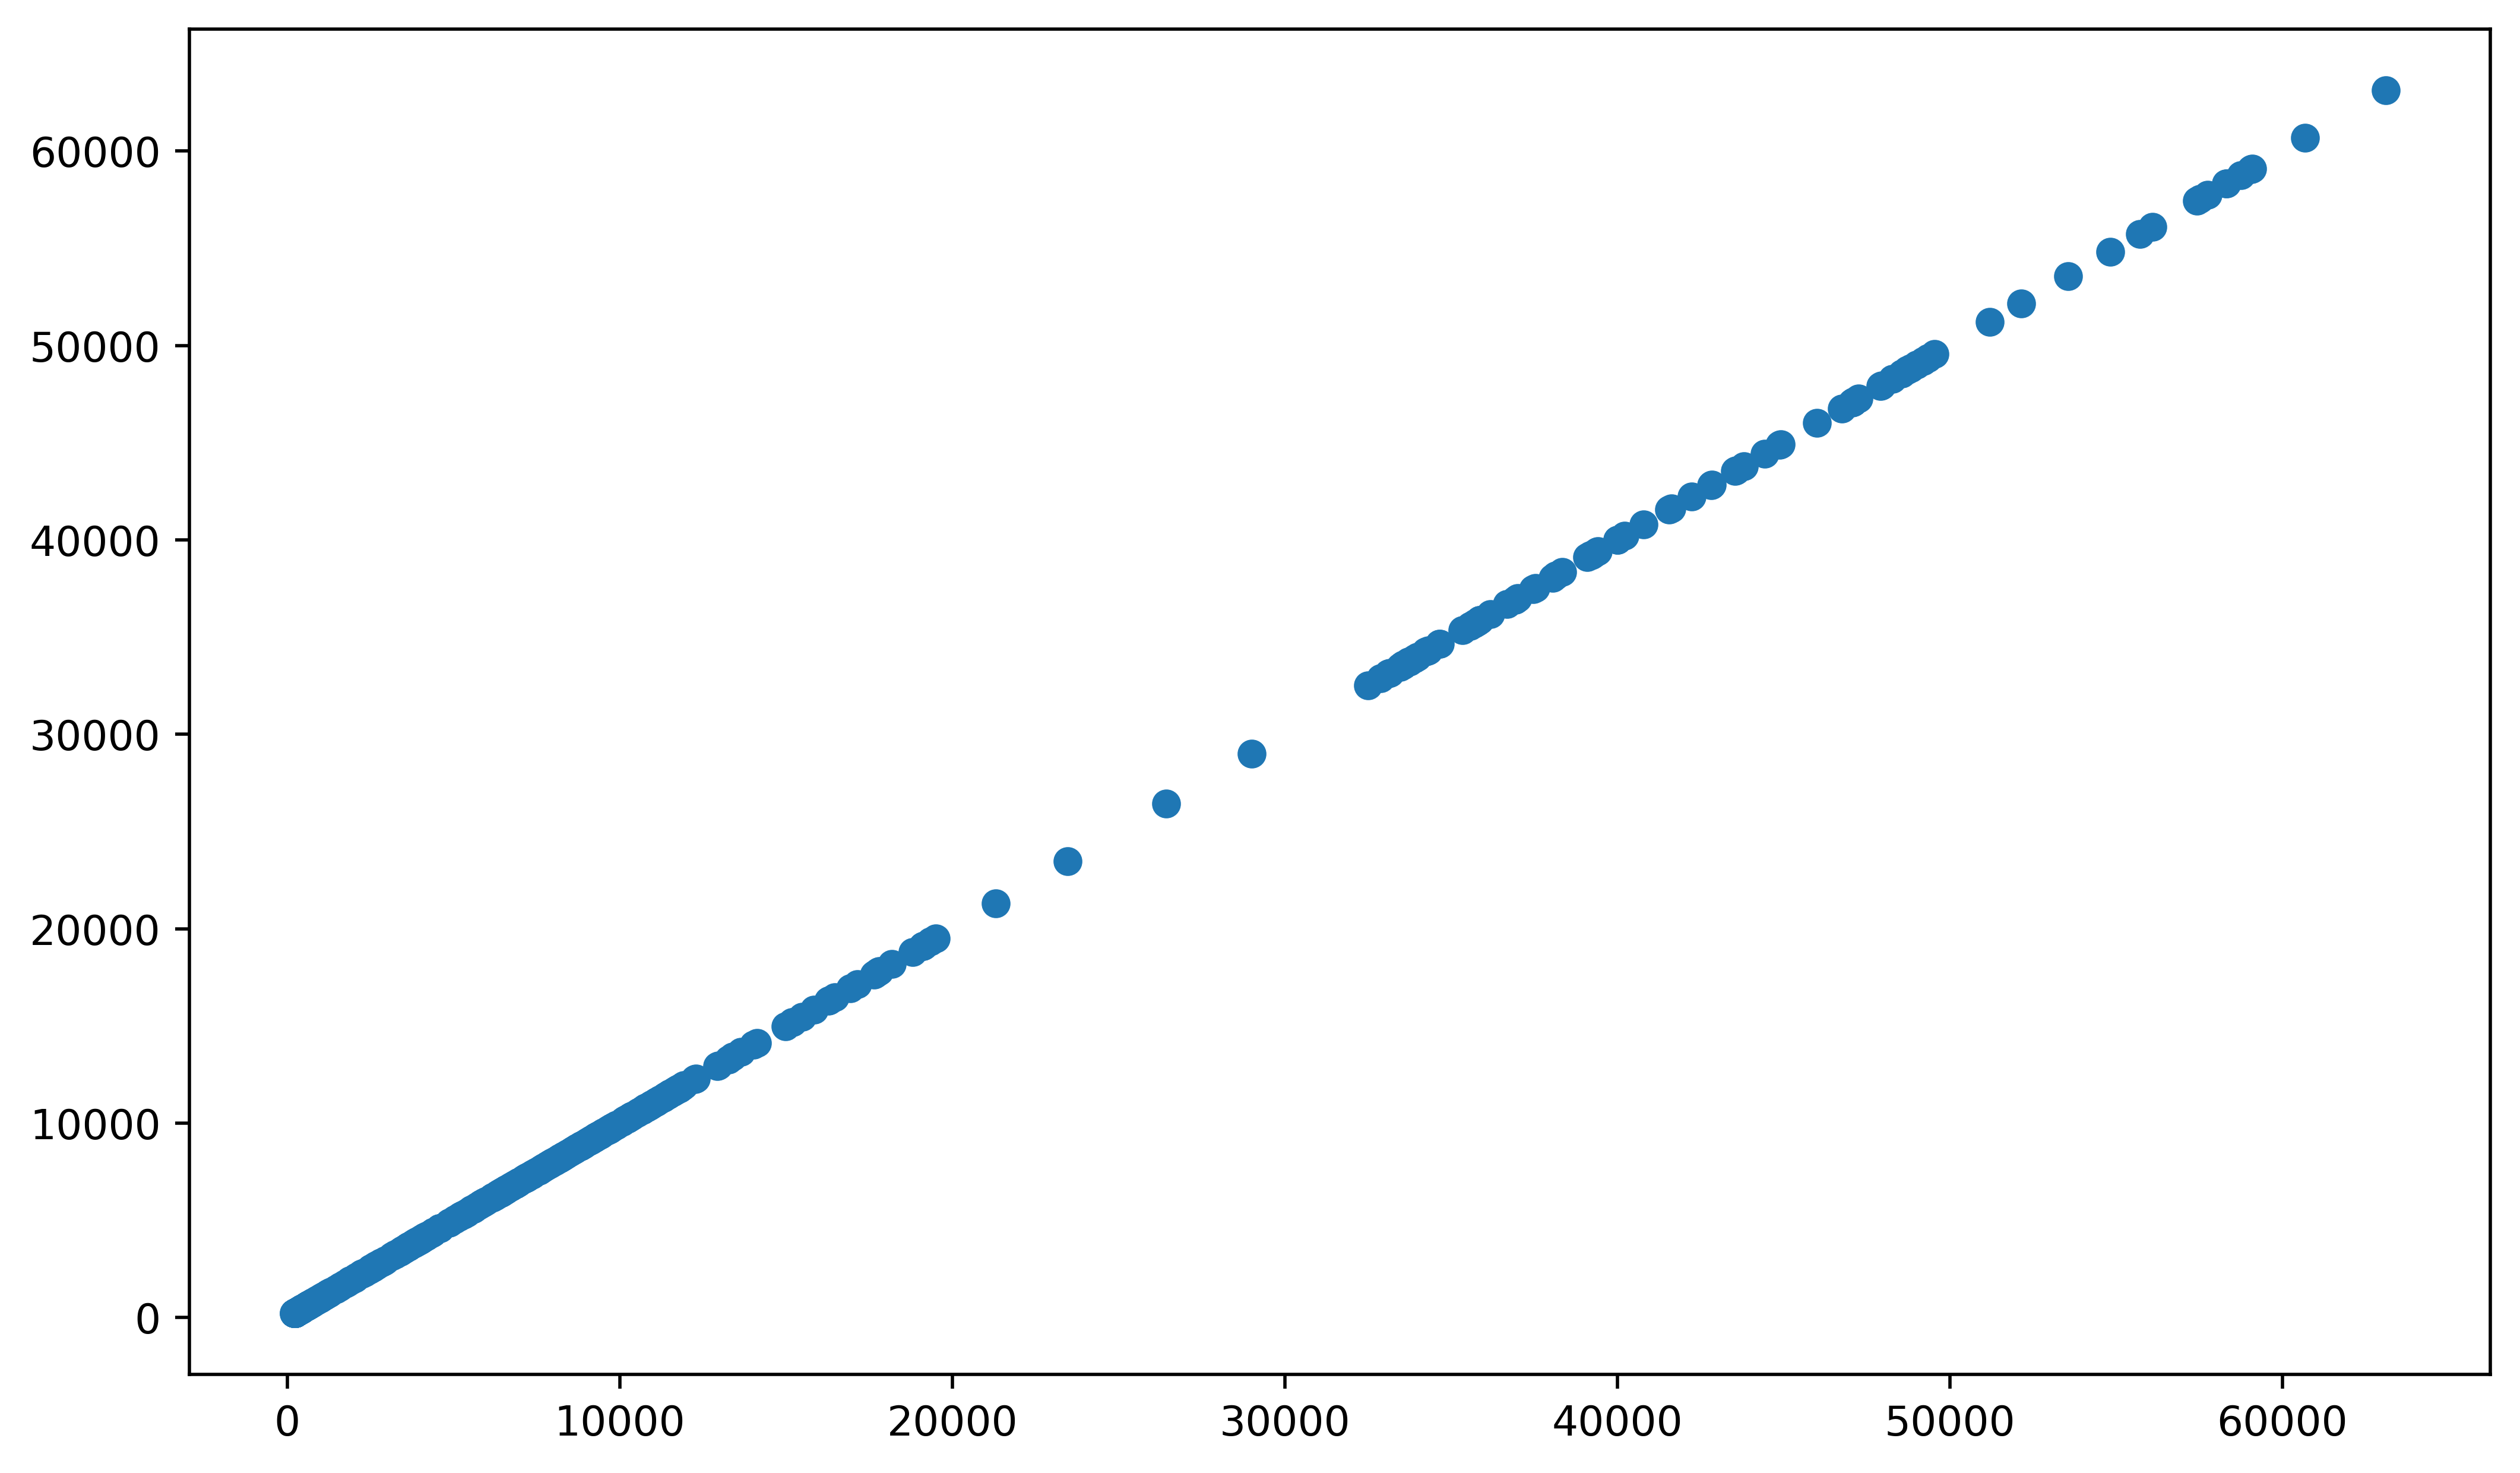

In [9]:
# Scikit learn 

def sklearn_model():
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    print(f"Mean of the target {np.mean(df['Adj Close'])} Mean square error is {mean_squared_error(y_pred, y_test)} and mean absolute error is {mean_absolute_error(y_pred, y_test)}")
    
    plt.figure(figsize=(10, 6), dpi = 500)
    
    preds = pd.DataFrame({
        'predictions': y_pred, 
        'actuals': y_test})
    plt.scatter(preds['predictions'], preds['actuals'])

sklearn_model() 

In [24]:
# Tensorflow model

early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 35)

model = Sequential([

  Dense(64, activation='relu'),
  Dropout(0.2),
  Dense(64, activation='relu'),
  Dropout(0.2),
  Dense(64, activation='relu'),
  Dense(1)
])

model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))

model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 64, callbacks=[early_stop], epochs = 5000, 
          verbose = 1)

Epoch 1/5000
27/27 [==============================] - 1s 7ms/step - loss: 9548.3896 - val_loss: 9508.5518
Epoch 2/5000
27/27 [==============================] - 0s 3ms/step - loss: 9545.3770 - val_loss: 9501.6924
Epoch 3/5000
27/27 [==============================] - 0s 3ms/step - loss: 9528.4111 - val_loss: 9467.3896
Epoch 4/5000
27/27 [==============================] - 0s 3ms/step - loss: 9460.3613 - val_loss: 9348.1484
Epoch 5/5000
27/27 [==============================] - 0s 3ms/step - loss: 9259.0049 - val_loss: 9043.3779
Epoch 6/5000
27/27 [==============================] - 0s 3ms/step - loss: 8858.9219 - val_loss: 8568.3486
Epoch 7/5000
27/27 [==============================] - 0s 3ms/step - loss: 8291.3896 - val_loss: 7918.0894
Epoch 8/5000
27/27 [==============================] - 0s 3ms/step - loss: 7492.4492 - val_loss: 6959.0933
Epoch 9/5000
27/27 [==============================] - 0s 3ms/step - loss: 6353.5391 - val_loss: 5790.5215
Epoch 10/5000
27/27 [=========================

Epoch 79/5000
27/27 [==============================] - 0s 2ms/step - loss: 795.0961 - val_loss: 218.0032
Epoch 80/5000
27/27 [==============================] - 0s 2ms/step - loss: 796.4224 - val_loss: 222.9027
Epoch 81/5000
27/27 [==============================] - 0s 2ms/step - loss: 810.8483 - val_loss: 175.5295
Epoch 82/5000
27/27 [==============================] - 0s 2ms/step - loss: 837.7610 - val_loss: 222.3291
Epoch 83/5000
27/27 [==============================] - 0s 2ms/step - loss: 767.0109 - val_loss: 263.8358
Epoch 84/5000
27/27 [==============================] - 0s 2ms/step - loss: 795.1786 - val_loss: 154.1153
Epoch 85/5000
27/27 [==============================] - 0s 2ms/step - loss: 801.5523 - val_loss: 251.7739
Epoch 86/5000
27/27 [==============================] - 0s 2ms/step - loss: 809.1070 - val_loss: 211.5107
Epoch 87/5000
27/27 [==============================] - 0s 2ms/step - loss: 789.0550 - val_loss: 163.2159
Epoch 88/5000
27/27 [==============================] - 

27/27 [==============================] - 0s 2ms/step - loss: 800.1897 - val_loss: 208.7958
Epoch 157/5000
27/27 [==============================] - 0s 2ms/step - loss: 789.8350 - val_loss: 227.7833
Epoch 158/5000
27/27 [==============================] - 0s 2ms/step - loss: 817.6248 - val_loss: 147.4758
Epoch 159/5000
27/27 [==============================] - 0s 2ms/step - loss: 814.4269 - val_loss: 198.1405
Epoch 160/5000
27/27 [==============================] - 0s 2ms/step - loss: 788.9764 - val_loss: 151.2407
Epoch 161/5000
27/27 [==============================] - 0s 2ms/step - loss: 748.2095 - val_loss: 199.0324
Epoch 162/5000
27/27 [==============================] - 0s 2ms/step - loss: 855.0336 - val_loss: 149.5598
Epoch 163/5000
27/27 [==============================] - 0s 2ms/step - loss: 838.4100 - val_loss: 188.2133
Epoch 164/5000
27/27 [==============================] - 0s 2ms/step - loss: 770.5258 - val_loss: 256.9388
Epoch 165/5000
27/27 [==============================] - 0s 2m

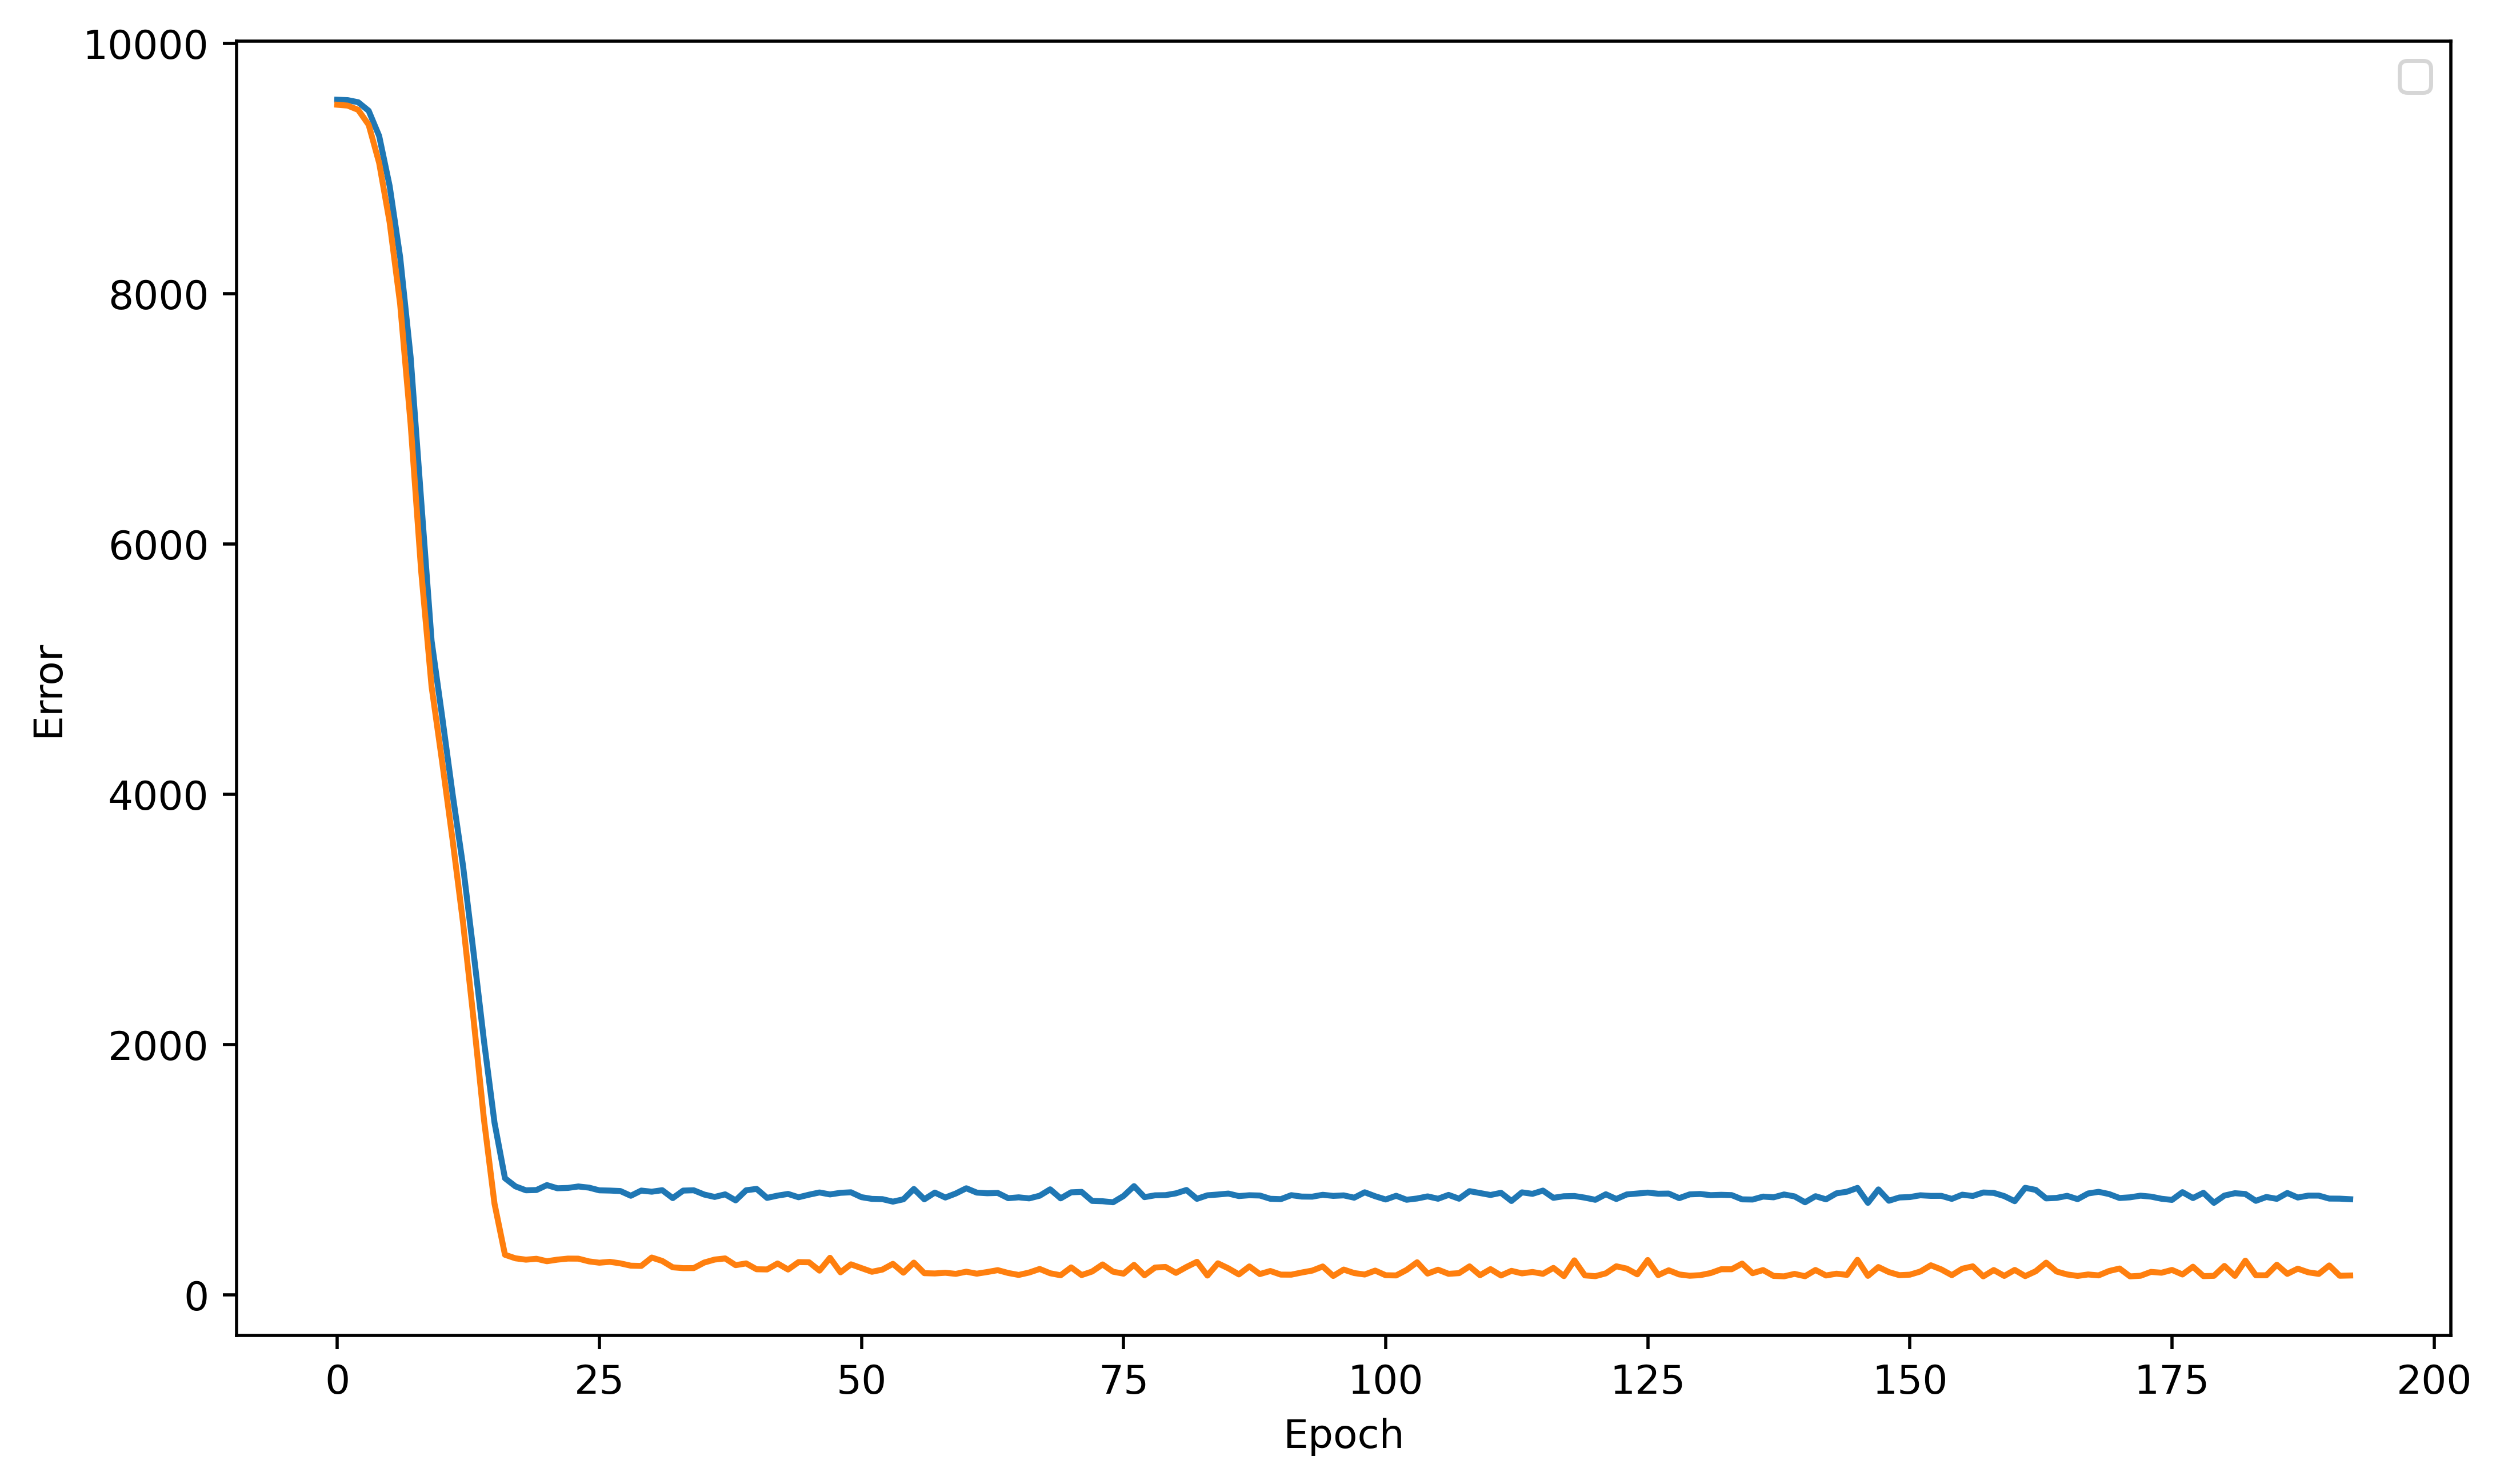

In [25]:
model_loss = pd.DataFrame(model.history.history)
labels = ['validation', 'loss']
plt.figure(figsize=(10, 6), dpi = 500)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(labels=labels)
plt.plot(model_loss)

In [26]:
model.evaluate(X_test, y_test)

24/24 [==============================] - 0s 801us/step - loss: 154.4910


154.490966796875

In [27]:
model.evaluate(X_train, y_train)

54/54 [==============================] - 0s 795us/step - loss: 146.6505


146.65048217773438

In [28]:
pred = model.predict(X_test)

In [29]:
pred = pred.reshape(-1)

In [30]:
comp = pd.DataFrame({
    'actual': y_test,
    'predicted': pred
})

comp

,actual,predicted
Date,,
2017-01-13,823.984009,819.782593
2015-07-29,289.589996,281.472717
2021-04-25,49004.253906,48885.503906
2019-06-01,8564.016602,8533.318359
2015-08-04,285.217987,274.742706
...,...,...
2019-08-05,11805.653320,11378.414062
2017-11-26,9330.549805,9076.149414
2017-01-12,804.833984,801.018982


In [31]:
comp['diff'] = comp['actual'] - comp['predicted']

In [32]:
comp

,actual,predicted,diff
Date,,,
2017-01-13,823.984009,819.782593,4.201416
2015-07-29,289.589996,281.472717,8.117279
2021-04-25,49004.253906,48885.503906,118.750000
2019-06-01,8564.016602,8533.318359,30.698242
2015-08-04,285.217987,274.742706,10.475281
...,...,...,...
2019-08-05,11805.653320,11378.414062,427.239258
2017-11-26,9330.549805,9076.149414,254.400391
2017-01-12,804.833984,801.018982,3.815002


/Users/bengroves/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='actual', ylabel='predicted'>

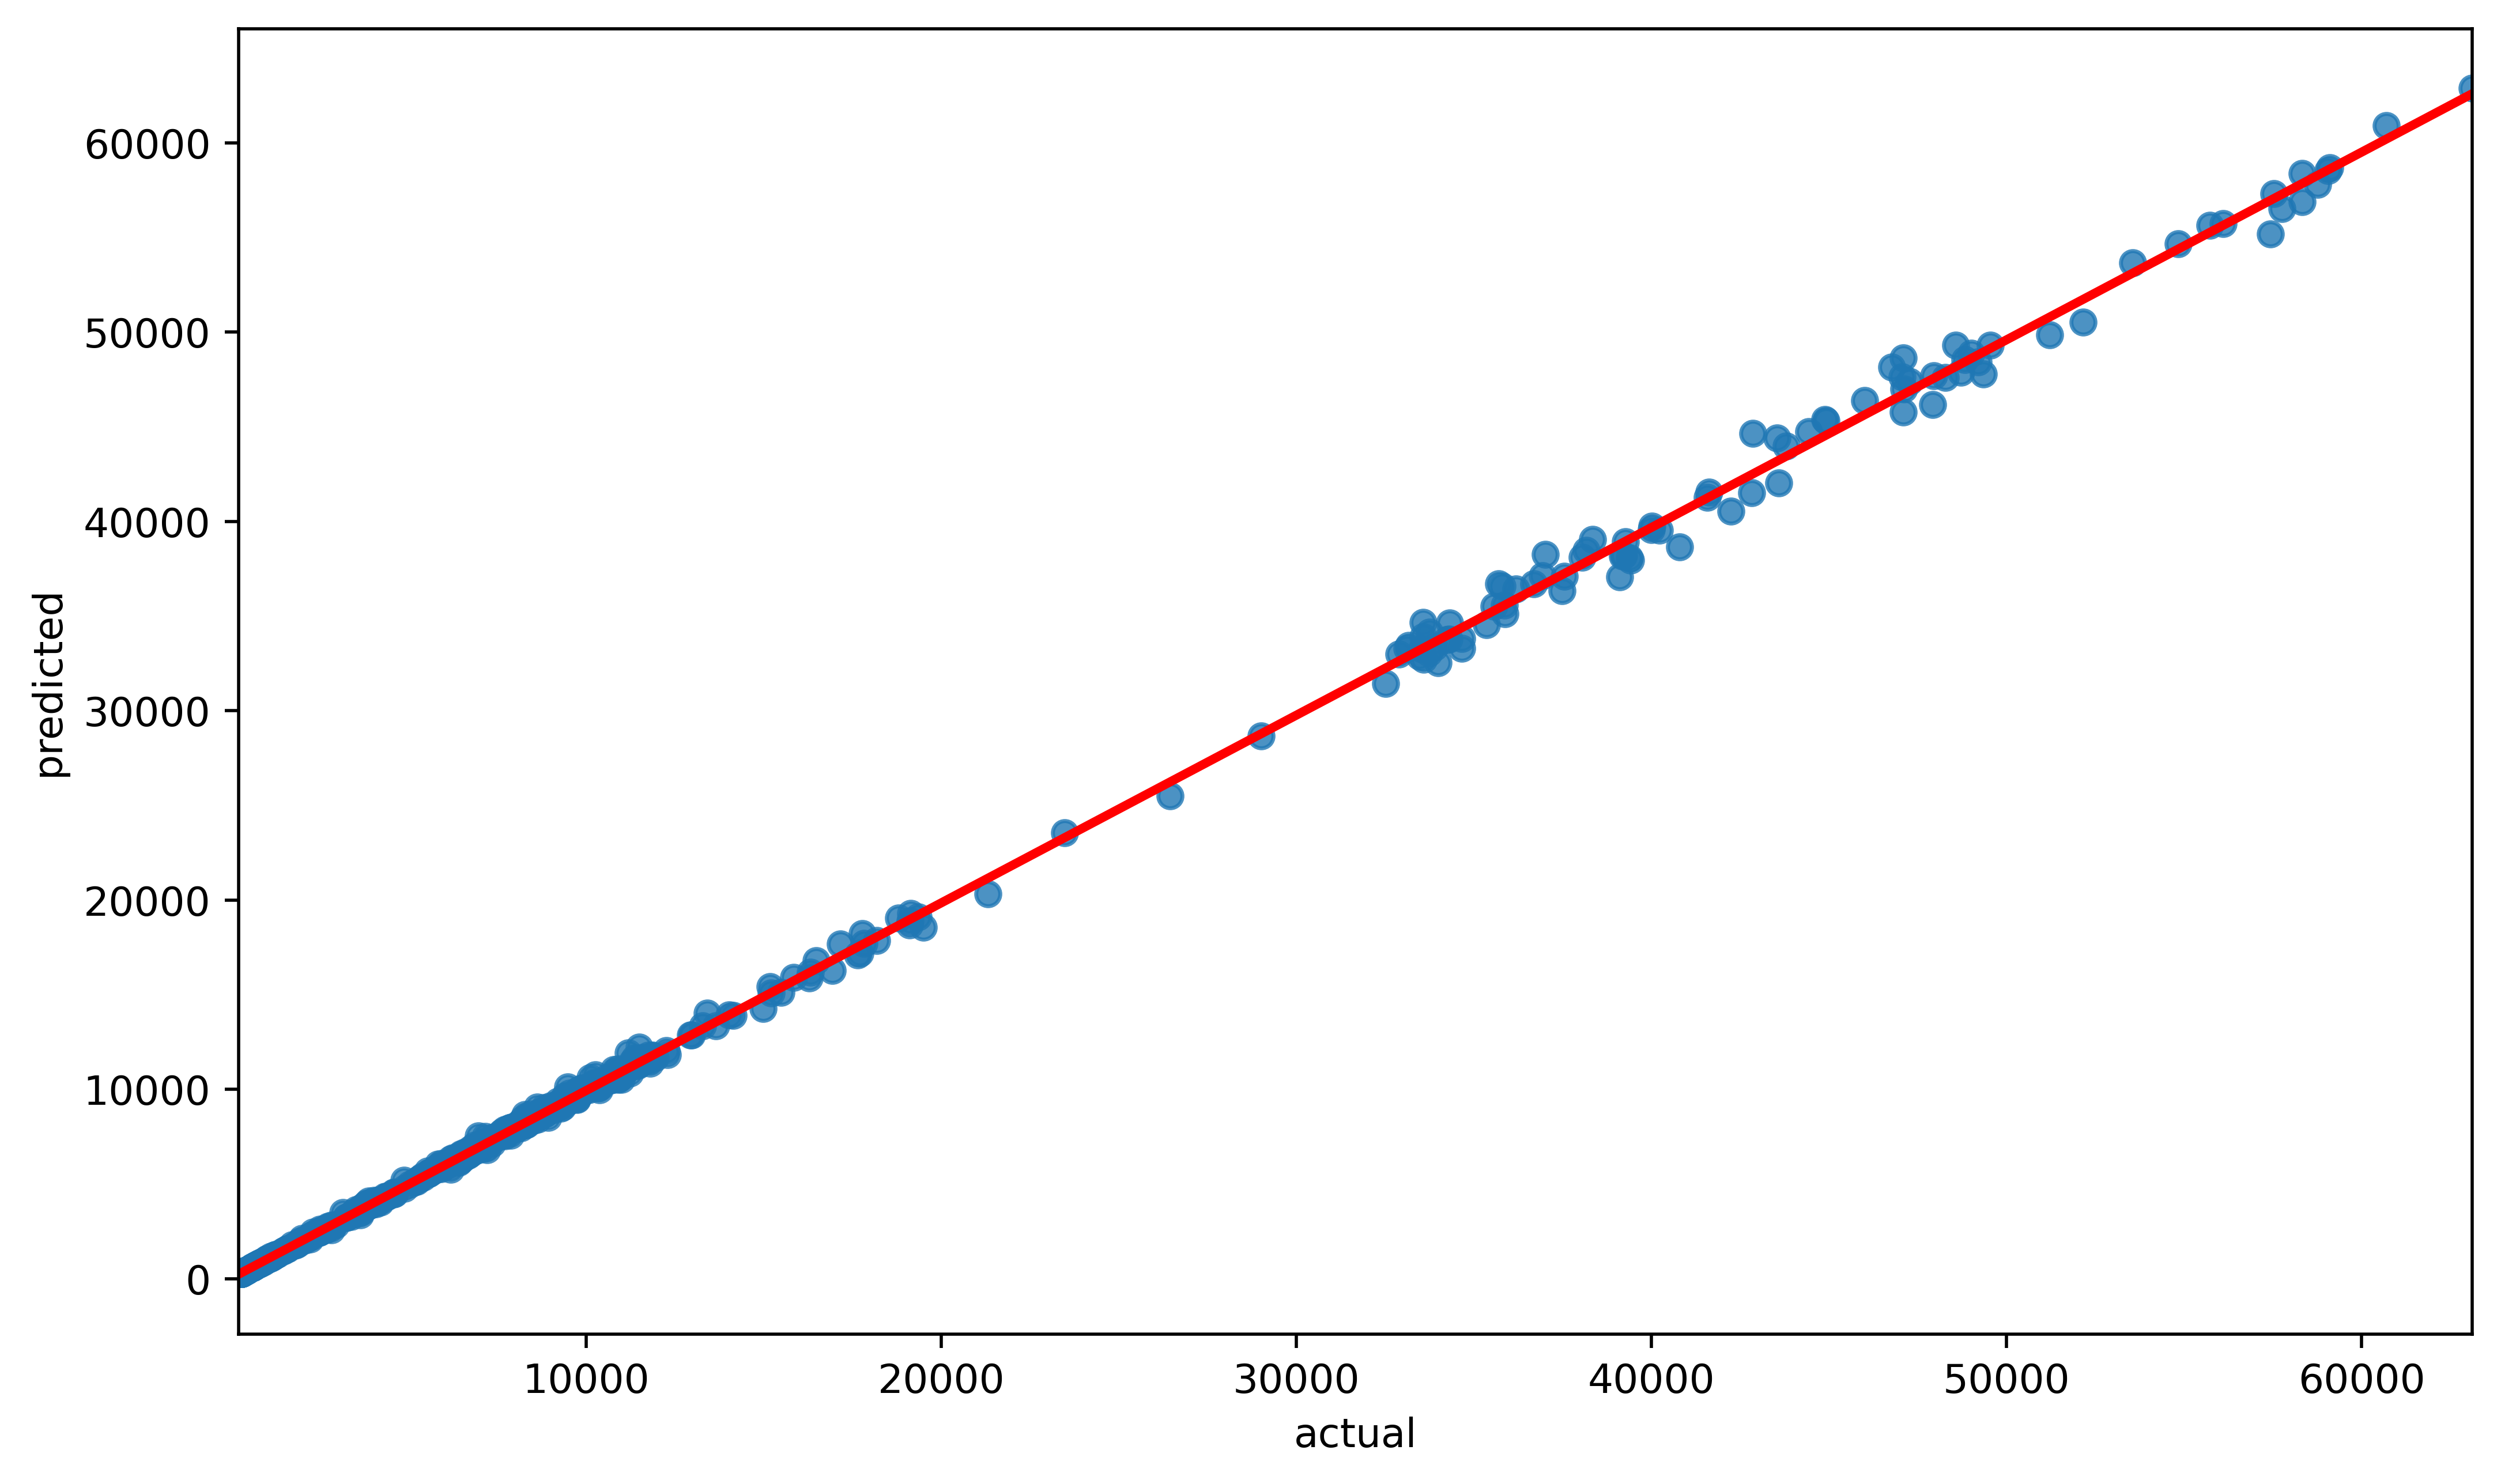

In [33]:
plt.figure(figsize=(10, 6), dpi = 500)
plt.ylabel("Actual value")
plt.xlabel("Predicted value")
sns.regplot(comp['actual'], comp['predicted'], line_kws={"color": "red"})

In [34]:
np.mean(comp['diff'])

52.337158327012325

In [63]:
df.iloc[0]

Open         3.204350e+02
High         3.204350e+02
Low          3.140030e+02
Close        3.142490e+02
Adj Close    3.142490e+02
Volume       8.036550e+06
Name: 2015-01-01 00:00:00, dtype: float64

In [46]:
test = pd.Series([320.43, 320.43, 314.002, 314.248, 314.248])
test = test.values.reshape(-1,5)

In [48]:
test = scaler.transform(test)

In [49]:
model.predict(test)

array([[306.6302]], dtype=float32)

In [54]:
df['Adj Close'][0]

314.2489929199219

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800
...,...,...,...,...,...,...
2021-09-27,43234.183594,44313.246094,42190.632812,42235.730469,42235.730469,30980029059
2021-09-28,42200.898438,42775.144531,40931.664062,41034.542969,41034.542969,30214940550
2021-09-29,41064.984375,42545.257812,40829.667969,41564.363281,41564.363281,30602359905


In [86]:
import requests
import json

url = "https://api.lunarcrush.com/v2?data=meta&key=9gv8oe7y467r2ahaqgrm5&type=full"
r = requests.get(url)

r.json()

{'config': {'data': 'meta', 'type': 'full'},
 'usage': {'day': 11, 'month': 11},
 'data': [{'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'short_summary': 'Bitcoin is a decentralized cryptocurrency invented by Satoshi Nakamoto. Bitcoin operates without a central bank or single administrator and can be sent from user to user on the peer-to-peer bitcoin network without the need for intermediaries. Transactions are verified by network nodes through cryptography and recorded in a distributed ledger called a blockchain.',
   'description': 'Bitcoin uses peer-to-peer technology to operate with no central authority or banks; managing transactions and the issuing of bitcoins is carried out collectively by the network. Bitcoin is open-source; its design is public, nobody owns or controls Bitcoin and everyone can take part. Through many of its unique properties, Bitcoin allows exciting uses that could not be covered by any previous payment system.',
   'features': None,
   'technology': 